In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import cross_validate, train_test_split

In [2]:
df = pd.read_csv ('breast-cancer-wisconsin.csv')

In [3]:
df.head()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhension,single_epith_cell_size,bare_nuclei,bland_chromatin,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
#replacing missing data

df.replace('?', -99999, inplace = True)
#most algorithms recognize (-99999) as a n outlier and would treat it as one

In [5]:
#Dropping unnecessary columns

df.drop(['id'], 1, inplace = True)

In [6]:
#Defining X and y
#X = features
#y = labels

X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

In [7]:
#Doing our cross validation, splitting our data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [8]:
#Defining our classifier

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [9]:
#Testing our data

accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9714285714285714


In [10]:
#Making a prediction

example_measures = np.array([[4,2,1,1,1,2,3,2,1], [4,2,1,2,2,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)

In [11]:
prediction = clf.predict(example_measures)
print(prediction)

[2 2]


#### Day 15

Euclidean Distance

Euclidean distance is the distance between two points defined as the square root of the sum of the squares of the differences between the corresponding coordinates of the points.

Where n is the number of dimensions in the dataset

i is dimensions, p is 1 point and q is another point

In [12]:
from math import sqrt

In [13]:
plot1 = [1,3]
plot2 = [2,5]

euclidean_distance = sqrt ((plot1[0] - plot2[0])**2 + (plot1[1] - plot2[1])**2)

print (euclidean_distance)

2.23606797749979


#### Day 16

Writing our K nearest neighbours algorithm

In [14]:
from matplotlib import style
import warnings
from collections import Counter
style.use('fivethirtyeight')

In [15]:
dataset = {'k':[[1,2],[2,3],[3,1]], 'r': [[6,5],[7,7],[8,6]]}

In [16]:
new_features = [5,7]

In [17]:
# for i in dataset:
#     for ii in dataset [i]:
#         plt.scatter(ii[0], ii[1], s = 100, color = i)
        
#you can also write the above equation as[[plt.scatter(ii[0], ii[1], s = 100, color = i)for ii indataset[i]]for i in dataset]

# plt.scatter(new_features[0], new_features[1])

# plt.show()

#### Day 17

euclidean_distance = sqrt((feature[0]-prediction[0]) ** 2 + (feature[1]-prediction[1]) ** 2)

the above equation for euclidean distance would work when it is a 2 feauture dimensional dataset, but would not work when it is more than a 2 feature dimensions dataset

So we use this instead

euclidean_distance = np.sqrt(np.sum((np.array(features) - np.array(predict)) ** 2 )

The simpler version of this is:

euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict))

In [18]:
#defining the k nearest neighbour algorithm

def k_nearest_neighbor(data, predict, k = 3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total warning groups!')
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([euclidean_distance, group])
    votes = [i[1]for i in sorted (distances)[:k]]
    #print(Counter(votes).most_common(1))
    vote_result = Counter(votes).most_common(1)[0][0]
    
    
#     knnalgos
    return vote_result

result = k_nearest_neighbor(dataset, new_features, k = 3)
print(result)

r


The Objective is to manually create our KNN algorithm and to  do this we would require three arguments ( the data we want to train,  the prediction we want to make and the number of neighbors we want to use) .We need to first understand some basics, such as

1. KNN classifies by choosing the closest data point to our predicting value using Euclidean distance.  The Euclidean distance measures the difference in length between the predicting value and every datapoint (features)
2. The number of neighbors(k) should be greater than the number of classes for instance if I have 2 classes  and I set my K to be 1 . My prediction can have the same Euclidean distance between both classes hence we won't be able to vote  for a class, else if I have k=3 my prediction will definitely have at least two Euclidean distance to a class ,thereby choosing this class .

Going to the code a function is defined with the the basics we will need ( data, prediction,  and neighbors)=> def K_nearest_neigbhors.

If len(data)>=K it will flag a warning i.e the number of class should be less than K.
For the" for loop"  our data here is in form of a dictionary, hence to access the features (dictionary values)  we need a double for loop the first to access the class/group/dictionary keys (for group in data)  second to access the features ( for features in data[group]) .

For each feature there exist a distance (Euclidean distance)  that measures the difference between each features and the new prediction , which is then passed into a list alongside the class/group of the feature ( distance.append(E.D, group)

Since we are only interested in the 3 nearest neighbor we first sort the distance in ascending order and stop at the 3rd index (sorted (distance) [:3].
The resulting list is then iterated over to check the the class with the highest number of votes ..votes =[i[1] for In  the sorted distance...

*note that the list is a list of lists with two elements in the each sublist that contains the distance in the 0th position and class in the 1st position * that's why we are iterating over i[1] not just i or i[0] because we are really interested in the class not the distance
Counter (votes).  Most_common(1) => The counter function counts the number of votes for most common class(1 represents classes)
Vote_result = counter(votes).most_common(1)[0][0]=> since the result gives a list of tuple , where the first element in the tuple is the class and the second element represents the number of votes of the class to access the first tuple and first element in the tuple which represent the class we have [0][0]

#### Day 18

Using our breast cancer dataset to have a broader understanding of k nearest neighbors

In [19]:
import random

In [20]:
def k_nearest_neighbor(data, predict, k = 3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total warning groups!')
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([euclidean_distance, group])
    votes = [i[1]for i in sorted (distances)[:k]]
    #print(Counter(votes).most_common(1))
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
    
    #print(vote_result, confidence)
#     knnalgos
    return vote_result, confidence

In [21]:
df = pd.read_csv ('breast-cancer-wisconsin.csv')

In [22]:
df.replace('?', -99999, inplace = True)

In [23]:
    #Dropping unnecessary columns

df.drop(['id'], 1, inplace = True)

In [24]:
    #converting the contents of the dataset to float

full_data = df.astype(float).values.tolist()

In [25]:
    #shuffling the data so as not to lose the features of the data (this is like scaling)

random.shuffle(full_data)

In [26]:
#a version of train_test_split 

test_size = 0.4
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}

#slicing the data
train_data = full_data [:-int(test_size*len(full_data))]
test_data = full_data [-int(test_size*len(full_data)):]

In [27]:
#populating the empty dictionaries

for i in train_data:
    train_set [i[-1]].append(i[:-1])
    
for i in test_data:
    test_set [i[-1]].append(i[:-1])

In [28]:
#passing the information through to k nearest neighbors

correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote, confidence = k_nearest_neighbor(train_set, data, k=5)
        if group == vote:
            correct += 1
#             else:
#                 print(confidence)
        total += 1

print ('Accuracy:', correct/total)
#accuracies.append(correct/total)

# print(sum(accuracies)/len(accuracies))

Accuracy: 0.967741935483871


### Day 19

K Accuracy and prediction

Increasing K does not necessarily do you a favour

**Confidence vs Accuracy**

Accuracy - Did we get the classification right?

Confidence can come from the classifier

The ratio of the voter result to the value of K is known as the Confidence interval.

When the test size is increased the confidence decreases.

**Some facts about k nearest neighbors**
- k nearest neighbors can be threaded, so you don't have to test each prediction point linearly, you can test each one on their own
- KNN can work on both linear and non linear data.

For linear data, you use regression for classification

For non linear data, you can't do classification, but you can do K nearest neighbors.

### Day 20

## Support Vector Machine (SVM)

SVM is another supervised machine learning classifier. It is the most popular machine learning algorithm.

SVM is a binary classifier so it separates only into 2 groups at a time. The 2 groups are denoted as positive and negative.

The objective of SVM is to find the best separating hyper plane or decision boundary that will separate data.

When you get the best separating hyper plane, you can now take in unknown data, if the unknown data rests on the positive side of the hyperplane, it becomes positive sample, and if it rests on the negative side, it becomes negative.

So the intuition of SVM is to find the best separating hyperplane and then we can classify new datapoints.

The goal of the SVM algorithm is to find the shortest distance to the hyperplane.

In [29]:
df = pd.read_csv ('breast-cancer-wisconsin.csv')

In [30]:
#replacing missing data

df.replace('?', -99999, inplace = True)
#most algorithms recognize (-99999) as a n outlier and would treat it as one

In [31]:
#Dropping unnecessary columns

df.drop(['id'], 1, inplace = True)

In [32]:
#Defining X and y
#X = features
#y = labels

X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

In [33]:
#Doing our cross validation, splitting our data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [34]:
#Defining our classifier

clf = svm.SVC()
clf.fit(X_train, y_train)

C:\Users\chidi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [35]:
#Testing our data

accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9785714285714285


In [36]:
#Making a prediction

example_measures = np.array([[4,2,1,1,1,2,3,2,1], [4,2,1,2,2,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)

In [37]:
prediction = clf.predict(example_measures)
print(prediction)

[2 2]


### Day 21

**Understanding Vectors**

A vector has both magnitude and direction.

### Day 22

**Support Vector Assertion**

SVM creates a decision boundary, the way a SVM classifies new points once it reaches the decision bounday is by first taking the vector that point perpendicularly to the separating hyperplane(vector w), you would project vector u(unknown data plane) on to vector w, then you would find out what side of the hyper plane vector u is on.

What is the calculation once we've trained a machine learning classifier?

vector u * vector w + b(bias)

If the equation above is >= 0, then it is a positive sample.

If the equation Vector u * vector w + b <= 0, then it is a negative sample.

If vector u * vector w = 0, then it means that it is on the decision boundary.

The unknown, vector u is a feature set comprised of x1 and x2

**How can we make an equation to go through our data and locate support vectors?

We introduce Y(subscript i) - this is the class of the features that we are passing through.

If the class is a + class, then Y (sub i) = +1 or 1

If the class is a - class, then Y (sub i) = -1 

We now multiply Y(sub i) by the equaations we were using to identify the positive and negative support vectors.

+class --> Xi * vector w + b = 1

-class --> Xi * vector w + b = -1

So now we multiply the equations above by Y(sub i) and then we set both equations = 0

### Day 23

**Calculation for the width that separates the hyperplane that goes through the support vectors

The support vector is a feature set that if moved, affects the position of the best separating hyperplane.

The separating hyperplane can be calculated by taking the width divided by 2.***

**Downside of SVM:** In SVM, you need all your featureset in memory to optimize, so if you have a very large dataset, it might not be feasible.

One way to go around this is you can use sequential minimal optimization when working with large dataset.

**Upside of SVM:** Once you have trained the SVM, you don't need old features anymore

### Day 24

**Support Vector Machine Optimization**

Equation for hyperplane is X(sub i)*W+b

Hyperplane for a positive class support vector => Xi*W+b = 1

Hyperplane for a negative class support vector => Xi*W+b = -1

Decision boundary => X*W+b=0 a feature set part of the decision bounday.

Formular for classification of a feature set after we've trained our classifier and optimized for W and b -> "sign"(Xi*W+b).

- "Sign" is positive if the above is above 0.
- "Sign" is negative if the above is below 0.
- "Sign" is a decision boundary if the above is 0.

Optimization Objective:

- To minimize the magnitude of vector W --> ||W||
- To maximize the bias b

What is the constraint of W and b when you plug it into an equation? --> Yi(Xi * W + b) >= 1 where Yi is the class, Xi is the known features, W is vector.

You can say that Yi(Xi * W+b) >= 1 ==> class(known features*W + b) >= 1. The known features are the testing data.

The shape of vector W is a 1 by 2 (1 x 2) matrix. Example [5, 3], the magnitude of vector is square root(5^2 + 3^2) which is the square root(34)


if vector W is [5, 5], you would plug it into Yi(Xi*W+b) >= 1 to see if we would find any b (bias) that satisfies the equation.

Then you would set it down to [4, 4], plug it into the equation to see if we would find any b(bias) that satisfies the equation, you would keep stepping it down until you can't step it down any more.

if Vector W = [10, 10], you plug it into Yi(Xi* W+b) >= 1, you would keep passing it to see if you can find something that satisfies the equation, if you can, you would save it to a dictionary called mag {||W|| : [W * b]} then you would find the one that has the lowest key or magnitude that would be your answer.

The minimum point is called the global minimum.

When you plug in every feature into the equation Yi(Xi * W + b) >= 1, the support vector would equal 1.

How will you know when you have solved the problem?

You would have something very close to 1 both for your positive and negative feature set when you feed it through the algorithm Yi(Xi * W + b) >= 1.

Support vector machine is a convex optimization problem.

### Day 25 & Day 26 & Day 27 & Day 28

**Creating an SVM from scratch**

In [38]:
from matplotlib import style
style.use('ggplot')

Optimized a step
Optimized a step
Optimized a step


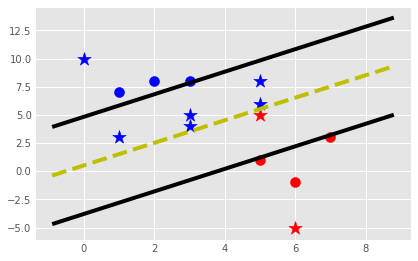

In [39]:
class Support_Vector_Machine:
    def __init__ (self, visualization = True):  #visualization would help to 'visualize'
        self.visualization = visualization
        self.colors = {1: 'r', -1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1, 1, 1)
    
    #train
    def fit(self, data):  
        self.data = data
        #{ ||w||:[w,b] }
        opt_dict = {}
        
        transforms = [[1,1],     #the tranforms are applied to the vector of 'w' as we step each time
                     [-1,1],
                     [-1,-1],
                     [1,-1]]
        all_data = [] #we are doing this so that we would get our maximum and minimum range
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
                    
        self.max_feature_value = max (all_data)
        self.min_feature_value = min (all_data)
        all_data = None
        
        step_sizes = [self.max_feature_value * 0.1,
                     self.max_feature_value * 0.01,
                      #point of expense:
                     self.max_feature_value * 0.001,]
        
        #extremely expensive:
        b_range_multiple = 2
        #we don't need to take as small of steps with b as we do with w
        b_multiple = 5
        
        latest_optimum = self.max_feature_value*10
        
        #the stepping process
        for step in step_sizes:
            w = np.array([latest_optimum, latest_optimum])
            
            #we can do this because of convex optimization
            optimized = False
            while not optimized:
                #we would iterate through b,   
                #np.arange is like range but it allows us to say how much of a step to take per time
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),self.max_feature_value*b_range_multiple,step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
#this is the weakest link in the SVM (this means that we have to run this function on all the data to make sure it fits)
#SMO attempts to fix this a bit
                        for i in self.data:
                            for xi in self.data[i]:
                                yi = i
                                if not yi*(np.dot(w_t, xi)+b)>=1:
                                    found_option = False
                                #print(yi*(np.dot(w_t, xi)+b))
                                
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]
                if w[0]<0:
                    optimized = True
                    print ('Optimized a step')
                else:
                    w = w - step
            norms = sorted([n for n in opt_dict])
            # ||w|| : [w,b]
            opt_choice = opt_dict [norms[0]]
            
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2     
    
    def predict(self, features):
        # sign (X.W+b) |dot product returns a scalar value
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification != 0 and self.visualization:
            self.ax.scatter(features [0], features [1], s = 200, marker = '*', c = self.colors[classification])
        return classification
    
    def visualize(self):
        [[self.ax.scatter(x[0], x[1], s = 100, color = self.colors[i])for x in data_dict[i]]for i in data_dict]
        
        def hyperplane(x,w,b,v): #this function gives us the hyperplane values where v is the value we are seeking.
            return (-w[0] * x - b + v) / w[1]
        datarange = (self.min_feature_value * 0.9, self.max_feature_value * 1.1)#this is used to limit our graph
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        
        #positive support vector hyperplane --> (w*x+b) = 1
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1) #psv would be a scalar value. In a graph, psv would be 'y'
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min, hyp_x_max], [psv1, psv2], 'k') #where hyp_x_min would be the 'x' in our graph
        #'k' means black color
        
        #negative support vector hyperplane --> (w*x+b) = -1
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1) #nsv would be a scalar value. In a graph, nsv would be 'y'
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min, hyp_x_max], [nsv1, nsv2], 'k') #where hyp_x_min would be the 'x' in our graph
        
        #decision support boundary --> (w*x+b) = 0
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0) #db would be a scalar value. In a graph, db would be 'y'
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min, hyp_x_max], [db1, db2], 'y--') #where hyp_x_min would be the 'x' in our graph
        # 'y--' means yellow color
        
        plt.show()
        
data_dict = {-1: np.array ([[1, 7],
                           [2, 8],
                           [3, 8],]),
            1: np.array ([[5, 1],
                          [6, -1],
                          [7, 3],])}

svm = Support_Vector_Machine()
svm.fit(data = data_dict)

predict_us = [[0, 10],
             [1, 3],
             [3, 4],
             [3, 5],
             [5, 5],
             [5, 6],
             [6, -5],
             [5, 8]]

for p in predict_us:
    svm.predict(p)
    
svm.visualize()



the larger your dataset, the longer it's going to take to do the fitment process, because you have to check every variable to see if it soots your equation.

convex optimization is valuable because you can tell when point of optimization is reached

we would iterate through b - not only do we want to check the magnitude of vector w, we also want the maximum b (most bias possible)

we have step* b_multiple because we don't need to take as small of steps as we have with w

You would know that you have found great values of the weights and bias(w and b) given that SVM is yi(xi. w+b) = 1 when if both your positive and negative classes, you have a value that is relatively close to 1 and until, you hit that value, you keep stepping.

Although, you should know that some problems can't be optimized.

We want v = x.w+b

Examples where we care what v is:

- in the positive support vector v = 1
- in the negative support vector, v = -1
- in the decision boundary, v = 0

It's important to note that the visualize function and the hyperplane function have no bearing on the SVM at all, it is purely for visualization for humans. It is mostly matplotlib stuff going on there

### Day 29

**Introduction to Kernels 

You can use kernels to do calculations in plausible infinite dimensions without having to pay the processing cost.

A kernel is a similarity function, it takes 2 inputs and outputs the similarity of these inputs.

It allows us to work with non-linear data by transforming the non linear data to another dimension and creating a linearly separable situation.

One major element to Kernels is that they are done using inner product.

Inner product and dot product are the same thing.

To find out if you can use a kernel, you have to be able to use inner product and the way that we can find out is that basically, you're trying to get to a new dimensional space.

Up till this point, we have been dealing with an x space, so we would get a z space now for kernels.

x = unknown featureset

classification --> y= sign(w*x+b)  

can we interchange x with z? yes...

w * x would return a scalar value, so it doesn't really matter if x is 5 dimensions or 50 dimensions. 

Therefore, Modifying x space to z space would not have an effect on the classification algorithm.

No longer Constraints when you use kernels:
- Yi(Xi.w + b ) - 1 >=0, Xi can be interchanged or replaced with Zi
- Every interaction is a dot product, so we can get away with kernels.

A kernel is not something unique to the Support Vector Machine, it is a similarity function. 

We can create out machine learning algorithms with kernels.

Kernels take 2 inputs and outs them using the inner product. Inner product is a projection of X1 unto X2.

We can use a kernel to help us transform our feature space (X space) because every interaction with that feature space is an inner product reaction.

### Day 30

#### Why Kernels?

we can utilize a Kernel to help us translate our data to a plausibly infinite number of dimensions in order to find one that has linear separability. We also learned that kernels can let us go out to these dimensions without actually paying the cost for these higher dimensions. Generally, kernels will be defined by something like: k(x, x^) where k = kernel, x^ = x_prime

The kernel function is applied to x and x prime, and will equal the inner product of z and z_prime, where the z values are from the z dimension (our new dimension space).

k(x, x^) = z * z^  where * = dot product, z^ = z_prime

The z values are the result of some function(x), and these z values are dotted together to give us our kernel function's result.

z = a function applied to its x counterpart.

z = function(x)

z^ = function (z^)

dot product or inner product produces a scalar value.

We still have yet to cover how this saves us any processing, so let's see an example. We'll start with the polynomial kernel, and compare the requirements of a polynomial kernel to simply taking our current vector and creating a 2nd order polynomial from it.

X = [X1, X2] Z = [1, X1, X2, X1 squared, X2 squared, X1X2]

The kernel applies the same function both x and x prime, so we'd make the same thing for z prime (x prime to the second order polynomial). From there, the final step is to take the dot product of the two:

X = [X1, X2]   Z = [1, X1, X2, X1 squared, X2 squared, X1X2]

K (X, X^)   Z^ = [1, X1^, X2^, X1^squared, X2^squared, X1^X2^]

k(x, x^) = z * z^ = 1 + X1 X1^ + X2 X2^ + X1squared X1^squared + X2squared X2^squared + X1 X1^ + X2 X2^

So all of that work was us manually working through a similar operation that the polynomial kernel is going to do. Luckily for us, our starting dimensions were only two! Now let's consider the polynomial kernel:

Can we do the kernel without visiting the z space? yes... by using the polynomial kernel.

k(x, x^) = (1 + X * X^) raised to the power of p

Notice right away, there are NO Z's mentioned here. This entire kernel is calculated using ONLY the x space! All you need here is to calculate using n number of dimensions and p for the power you want to use. Your equation will look something like:

k(x, x^) = (1 + X * X^) raised to the power of p

(1 + X1  X1^ + ... Xn Xn^) raised to the power of p

If you calculate this all out, your new vectors, which would correspond to the z-space vectors would be something like:

[1, X1, X2, _/2 X1,_/2 X2, _/2 X1 X2]    where _/ = square root

That said, you never need to go out that far. You simply stick with the polynomial kernel, which is going to simply return the dot product for you, without you needing to actually calculate the vectors then take a very large dot product!

There are quite a few pre-made kernels, but the only other one I will show here is the Radial Basis Function (RBF) kernel, purely since it's typically the default kernel used, and can take us to a proposed "infinite" number of dimensions

k(x, x^) = exp (-& ||x - x^|| squared)

where & = gamma

exp (x) = e raised to power x

The value for gamma there is the topic of some possibly future tutorial. So there you have kernels, why you would want to use them, how to use them, and hopefully a decent depiction of how they can allow you to work with larger dimensions without paying the extremely high processing costs! In the next tutorial, we're going to talk about another solution to both non-linear data, as well as to over-fitment issues with data.

### Day 31

**Soft Margin SVM**

If you overfit to historical data, it's just likely that in the future data, you won't be right because the future would be different from the past data, it might have noise, so if you fit the past data, you would mess up in the future data.

A classifier with violating data in the separating hyperplane is known as a soft margin SVM.

There are two major reasons why the soft-margin classifier might be superior.

- One reason is your data is not perfectly linearly separable, but is very close and it makes more sense to continue using the default linearly kernel. 
- The other reason is, even if you are using a kernel, you may wind up with significant over-fitment if you want to use a hard-margin.

A classifier having perfectly separated data points in the decision hyperplane is known as a Hard Margin SVM

we have here is a "soft margin" classifier, which allows for some "slack" on the errors that we might get in the optimization process.

The value of slack in SVM can best be represented with S >= 0

Yi (Xi * W + b) >= 1 - Slack

Our new optimization is the above calculation, where slack is greater than or equal to zero. 

The closer to 0 the slack is, the more "hard-margin" we are. The higher the slack, the more soft the margin is. 

If slack was 0, then we'd have a typical hard-margin classifier. As you might guess, however, we'd like to ideally minimize slack. To do this, we add it to the minimization of the magnitude of vector w:

Thus, we actually want to minimize 1/2||w||^2 + (C * The sum of all of the slacks used).With that, we brough in yet another variable, C. 

C is a multiplier for the "value" of how much we want slack to affect the rest of the equation. The lower C, the less important the sum of the slacks is in relation to the magnitude of vector w, and visa versa. In most cases, C will be defaulted to 1.

### Day 32

**Kernels, Soft Margin SVM, and Quadratic Programming with Python and CVXOPT**

Python-version of kernels, soft-margin, and solving the quadratic programming problem with CVXOPT

You will likely never actually need to use CVXOPT. The library that most people use for the Support Vector Machine optimization is LibSVM

In [40]:
from numpy import linalg
import cvxopt
import cvxopt.solvers
             
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x, y, p=3):
    return (1 + np.dot(x, y)) ** p

def gaussian_kernel(x, y, sigma=5.0):
    return np.exp(-linalg.norm(x-y)**2 / (2 * (sigma ** 2)))

class SVM(object):

    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Gram matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j])

        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1,n_samples))
        b = cvxopt.matrix(0.0)

        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            tmp1 = np.diag(np.ones(n_samples) * -1)
            tmp2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        a = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        print("%d support vectors out of %d points" % (len(self.a), n_samples))

        # Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n],sv])
        self.b /= len(self.a)

        # Weight vector
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            for n in range(len(self.a)):
                self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None

    def project(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                    s += a * sv_y * self.kernel(X[i], sv)
                y_predict[i] = s
            return y_predict + self.b

    def predict(self, X):
        return np.sign(self.project(X))

if __name__ == "__main__":
    import pylab as pl

    def gen_lin_separable_data():
        # generate training data in the 2-d case
        mean1 = np.array([0, 2])
        mean2 = np.array([2, 0])
        cov = np.array([[0.8, 0.6], [0.6, 0.8]])
        X1 = np.random.multivariate_normal(mean1, cov, 100)
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 100)
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2

    def gen_non_lin_separable_data():
        mean1 = [-1, 2]
        mean2 = [1, -1]
        mean3 = [4, -4]
        mean4 = [-4, 4]
        cov = [[1.0,0.8], [0.8, 1.0]]
        X1 = np.random.multivariate_normal(mean1, cov, 50)
        X1 = np.vstack((X1, np.random.multivariate_normal(mean3, cov, 50)))
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 50)
        X2 = np.vstack((X2, np.random.multivariate_normal(mean4, cov, 50)))
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2

    def gen_lin_separable_overlap_data():
        # generate training data in the 2-d case
        mean1 = np.array([0, 2])
        mean2 = np.array([2, 0])
        cov = np.array([[1.5, 1.0], [1.0, 1.5]])
        X1 = np.random.multivariate_normal(mean1, cov, 100)
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 100)
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2

    def split_train(X1, y1, X2, y2):
        X1_train = X1[:90]
        y1_train = y1[:90]
        X2_train = X2[:90]
        y2_train = y2[:90]
        X_train = np.vstack((X1_train, X2_train))
        y_train = np.hstack((y1_train, y2_train))
        return X_train, y_train

    def split_test(X1, y1, X2, y2):
        X1_test = X1[90:]
        y1_test = y1[90:]
        X2_test = X2[90:]
        y2_test = y2[90:]
        X_test = np.vstack((X1_test, X2_test))
        y_test = np.hstack((y1_test, y2_test))
        return X_test, y_test

    def plot_margin(X1_train, X2_train, clf):
        def f(x, w, b, c=0):
            # given x, return y such that [x,y] in on the line
            # w.x + b = c
            return (-w[0] * x - b + c) / w[1]

        pl.plot(X1_train[:,0], X1_train[:,1], "ro")
        pl.plot(X2_train[:,0], X2_train[:,1], "bo")
        pl.scatter(clf.sv[:,0], clf.sv[:,1], s=100, c="g")

        # w.x + b = 0
        a0 = -4; a1 = f(a0, clf.w, clf.b)
        b0 = 4; b1 = f(b0, clf.w, clf.b)
        pl.plot([a0,b0], [a1,b1], "k")

        # w.x + b = 1
        a0 = -4; a1 = f(a0, clf.w, clf.b, 1)
        b0 = 4; b1 = f(b0, clf.w, clf.b, 1)
        pl.plot([a0,b0], [a1,b1], "k--")

        # w.x + b = -1
        a0 = -4; a1 = f(a0, clf.w, clf.b, -1)
        b0 = 4; b1 = f(b0, clf.w, clf.b, -1)
        pl.plot([a0,b0], [a1,b1], "k--")

        pl.axis("tight")
        pl.show()

    def plot_contour(X1_train, X2_train, clf):
        pl.plot(X1_train[:,0], X1_train[:,1], "ro")
        pl.plot(X2_train[:,0], X2_train[:,1], "bo")
        pl.scatter(clf.sv[:,0], clf.sv[:,1], s=100, c="g")

        X1, X2 = np.meshgrid(np.linspace(-6,6,50), np.linspace(-6,6,50))
        X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
        Z = clf.project(X).reshape(X1.shape)
        pl.contour(X1, X2, Z, [0.0], colors='k', linewidths=1, origin='lower')
        pl.contour(X1, X2, Z + 1, [0.0], colors='grey', linewidths=1, origin='lower')
        pl.contour(X1, X2, Z - 1, [0.0], colors='grey', linewidths=1, origin='lower')

        pl.axis("tight")
        pl.show()

    def test_linear():
        X1, y1, X2, y2 = gen_lin_separable_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM()
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))

        plot_margin(X_train[y_train==1], X_train[y_train==-1], clf)

    def test_non_linear():
        X1, y1, X2, y2 = gen_non_lin_separable_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM(polynomial_kernel)
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))

        plot_contour(X_train[y_train==1], X_train[y_train==-1], clf)

    def test_soft():
        X1, y1, X2, y2 = gen_lin_separable_overlap_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM(C=1000.1)
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))

        plot_contour(X_train[y_train==1], X_train[y_train==-1], clf)

        
    #test_linear()
    #test_non_linear()
    #test_soft()


ModuleNotFoundError: No module named 'cvxopt'

### Day 33

**Support Vector Machine Parameters**

SVM is a binary classifier. This means, at any one time, the SVM optimization is really tasked to separate one group from another. 

The question is then how we might classify a total of 3 or more groups. 

Typically, the method is to do what is referred to as "One Verse Rest" or (OVR). 

The idea here is you separate each group from the rest. For example, to classify three separate groups (1, 2, and 3), you would start by separating 1 from 2 and 3. Then you would separate 2 from 1 and 3. Then finally separate 3 from 1 and 2. 

There are some issues with this, as things like confidence may be different per classification boundary, also the separation boundaries may be slightly flawed since there are almost always going to be more negatives than positives, since you're maybe comparing one group to three others. 

Assuming a balanced dataset at the start, this would mean every classification boundary is actually unbalanced.

Another method is One-vs-One (or OVO). In this case, consider you have three total groups. The way this works is you have a specific boundary that separates 1 from 3 and 1 from 2, and this process repeats for the rest of the classes. In this way, the boundaries may be more balanced.

The first parameter is C. This tells you right away that this is a soft-margin classifier. You can adjust C however you like, and you could make C high enough to create a hard-margin classifier. Recall C is used in the soft-margin optimization function for ||w|| i.e. minimize 1/2||w||^2 + (C * The sum of all of the slacks used).

The default value for C is just a simple 1, and that really should be fine in most cases.



Next we have a choice of kernel. The default here is the rbf kernel, but you can also just have a linear kernel, a poly (for polynomial), sigmoid, or even a custom one of your choosing or design.

Next, you have the degree value, defaulting to 3, which is just the degree of the polynomial, if you are using the poly value for the kernel.

gamma is where you can set the gamma value for the rbf kernel. You should leave this as auto.

coef0 allows you to adjust the independent term in your kernel function, but you should also leave this alone most likely, and it is only used in the polynomial and sigmoid kernels.

The probability parameter setting may prove useful to you. Recall how an algorithm like K Nearest Neighbors not only has a model accuracy, but also each prediction can have a degree of "confidence." The SVM doesn't inherently have an attribute like this, but you can use this probability parameter to enable a form of one. This is a costly functionality, but may be important enough to you to enable it, otherwise the default is False.

Next, we have the shrinking boolean, which is defaulted to True. This has to do with whether or not you want a shrinking heuristic used in your optimization of the SVM, which is used in Sequential Minimal Optimization (SMO). You should leave this True, as it should greatly improve your performance, for very little loss in terms of accuracy in most cases.

The tol parameter is a setting for the SVM's tolerance in optimization. Recall that yi(xi.w+b)-1 >= 0. For an SVM to be valid, all values must be greater than or equal to 0, and at least one value on each side needs to be "equal" to 0, which will be your support vectors. Since it is highly unlikely that you will actually get values equal perfectly to 0, you set tolerance to allow a bit of wiggle room. The default tol with Scikit-Learn's SVM is 1e-3, which is 0.001.

The next important parameter is max_iter, which is where you can set a maximum number of iterations for the quadratic programming problem to cycle through to optimize. The default is -1, which means there is no limit.

The decision_function_shape is one-vs-one (ovo) or one-vs-rest (ovr), which is the concept discussed at the beginning of this tutorial.

random_state is used for a seed in the probability estimation, if you wanted to specify it. Doing probability on a large dataset would be hard.

Aside from the parameters, we also have a few attributes:

support_ gives you the index values for the support vectors. support_vectors_ are the actual support vectors. n_support_ will tell you how many support vectors you have, which is useful for comparing to your dataset size to determine if you may have some statistical issues. The last 3 parameters dual_coef_, coef_, and intercept_ will be useful if you plan to graph the SVM, for example.